In [ ]:
# importing necessary libraries

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [35]:
#loading the dataset

In [36]:
data=pd.read_csv('D:\Documents\Data Sets\car data.csv')

In [37]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [38]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [40]:
#information about the dataset

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [42]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [43]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [44]:
#checking for null value

In [45]:
data.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [46]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [47]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [48]:
data['Fuel_Type'].replace(regex={"Petrol":"0","Diesel":"1","CNG":"2"},inplace=True)

In [49]:
data['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [50]:
data['Selling_type'].replace(regex={"Dealer":"0","Individual":"1"},inplace=True)

In [51]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [52]:
data['Transmission'].replace(regex={"Manual":"0","Automatic":"1"},inplace=True)

In [53]:
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


In [54]:
#visualizing the dataset

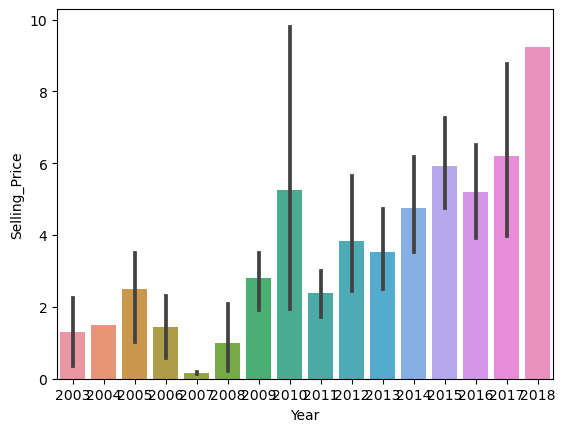

In [55]:
sns.barplot(x="Year",y="Selling_Price",data=data)
plt.show()

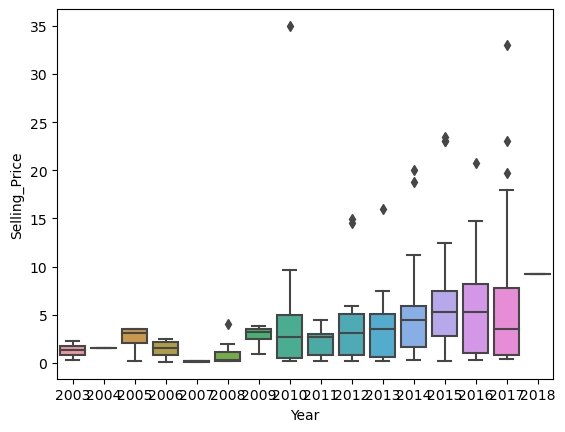

In [56]:
sns.boxplot(x="Year",y="Selling_Price",data=data)
plt.show()

In [57]:
y=data['Selling_Price']
x=data.drop(['Selling_Price','Car_Name'],axis=1)

In [23]:
x

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [24]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [58]:
#training and testing the dataset

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [60]:
model=LR()

In [61]:
model.fit(x_train,y_train)

LinearRegression()

In [62]:
y_predict=model.predict(x_test)

In [63]:
y_predict

array([ 7.88331539e+00,  2.96366336e+00, -6.74543886e-01,  4.23711992e+00,
        4.51503916e-01,  5.88350000e+00,  1.97157003e+00,  2.54819541e+00,
        7.82930714e+00,  9.85470427e-01,  7.86989993e+00,  3.54467268e+00,
        4.93138319e+00,  4.75298087e+00, -2.18460234e+00,  3.11906294e+00,
        7.75351063e+00,  6.47895273e+00,  6.91187897e+00,  7.77709781e+00,
        4.39683812e+00,  4.00973720e+00,  1.14495781e+01,  8.09677172e+00,
        9.94185585e+00,  6.88063104e+00,  3.87475401e+00,  1.05977654e+00,
       -5.97865438e-01, -6.68812538e-01, -1.85071218e-02, -1.35201796e+00,
        4.32249890e+00,  2.06194688e+01,  1.86632425e+01,  4.31955651e+00,
        3.49232124e+00,  1.67127764e+00, -1.99380530e-02,  5.76227075e+00,
        8.19827728e+00,  9.68153628e+00,  4.49883432e-01,  5.78875619e+00,
        5.62737408e+00,  4.36487163e+00,  7.12069954e+00,  5.94494367e+00,
        7.97333949e+00,  1.67416352e+00,  3.84792247e+00,  1.76833868e+00,
        2.48229349e+00,  

In [64]:
print(r2_score(y_test,y_predict))

0.8381632959010454


In [65]:
print(mean_squared_error(y_test,y_predict))

3.3501421470445414
